# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [1]:
 ! git clone https://www.github.com/DS3001/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 29 (delta 2), reused 3 (delta 1), pack-reused 21 (from 1)
Receiving objects: 100% (29/29), 1.95 MiB | 19.93 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups. 
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

In [5]:
data = pd.read_csv('/Users/emorywise/Desktop/DS3001 Data/mammogram.csv')
data.head()

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


In [11]:
data['no'] = 0
data.loc[ data['breast_cancer_death']=='no','no'] = 1
print(pd.crosstab(data['treatment'], data['breast_cancer_death']))

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500


There is little to no difference in the 25-year survival rates between the control and mammogram groups.

In [15]:
# Full sample promotion averages and difference:
data_c = data.loc[ data['treatment'] =='control', 'no' ]
N_c = data_c.shape[0]
data_t = data.loc[ data['treatment'] =='mammogram', 'no' ]
N_t = data_t.shape[0]
diff_0 =  data_t.mean() - data_c.mean()
print(diff_0)

0.00011505110015985753


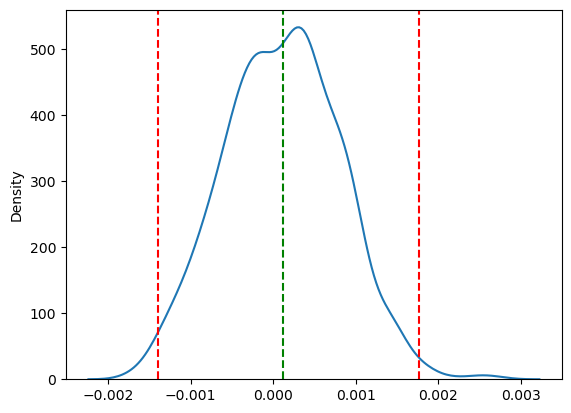

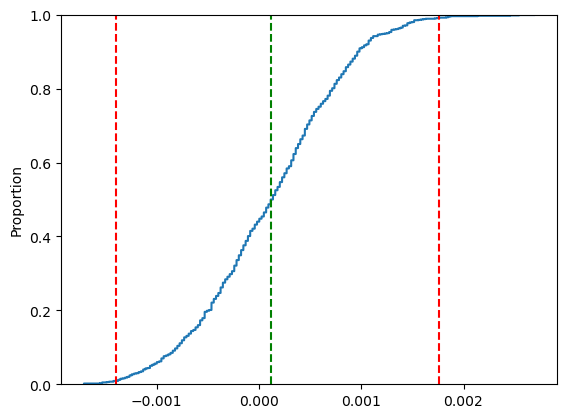

In [24]:
# Simulation:
S = 1000
rate_c = np.zeros(S) # Control survival rate
rate_t = np.zeros(S) # Treatment survival rate
diff = np.zeros(S)  # Difference in survival rates

# Bootstrapping:
for s in range(S):
    sample_c = data_c.sample(N_c,axis=0,replace=True)
    rate_c[s] = sample_c.mean()
    sample_t = data_t.sample(N_t,axis=0,replace=True)
    rate_t[s] = sample_t.mean()
    diff[s] = rate_t[s]-rate_c[s]
    
# Density plot of differences in rates, CI:
ax = sns.kdeplot(diff)
ax.axvline(x = diff_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

# ECDF of differences in rates, CI:
ax = sns.ecdfplot(diff)
ax.axvline(x = diff_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

In [19]:
# Determine 99% confidence interval
CI = np.quantile(diff,[.01,.99]) # Compute 99% CI
print('Point Estimate: ', diff_0)
print( 'CI: ' + str(CI) )

Point Estimate:  0.00011505110015985753
CI: [-0.00139903  0.00176242]


Yes, the interval includes 0.

Mammograms are a method of detecting cancer, not necessarily treating it. So, we have no idea how these women went about treating their cancer prior to detection, which could lead us to false conclusions about the effectiveness of mammograms.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

In [26]:
data = pd.read_csv('./the_bootstrap/data/diabetes_hw.csv')
data.head()

,Unnamed: 0,treatment,outcome
0,1,met,success
1,2,rosi,failure
2,3,rosi,success
3,4,lifestyle,success
4,5,met,success


In [29]:
data['success'] = 0
data.loc[data['outcome']=='success','success'] = 1
print(pd.crosstab(data['treatment'], data['outcome']))

outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143


In [30]:
success_lifestyle = 125/(125+109)
success_met = 112/(120+112)
success_rosi = 143/(90+143)

print(success_lifestyle)
print(success_met)
print(success_rosi)

0.5341880341880342
0.4827586206896552
0.6137339055793991


The rosiglitazone treatment appears to be the most effective.

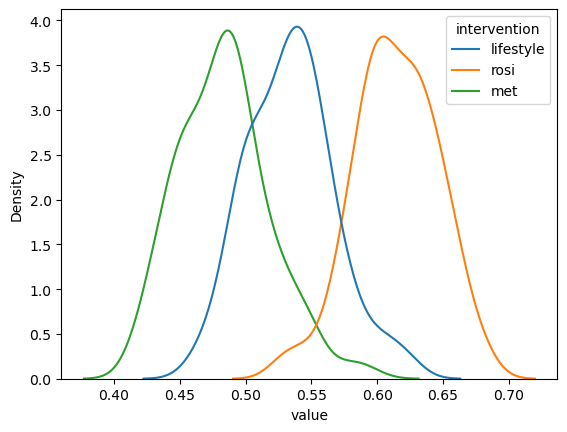

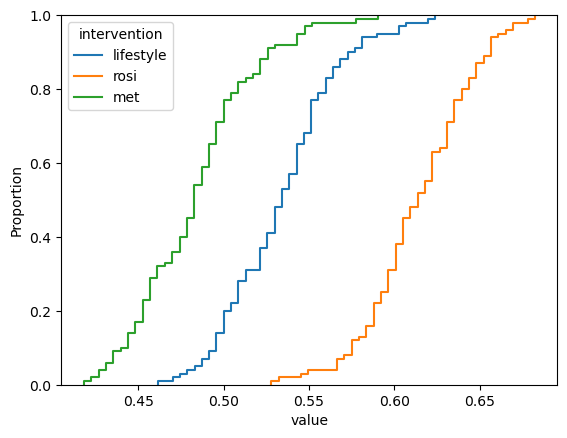

In [32]:
data_lif = data.loc[ data['treatment'] == 'lifestyle', :]
data_ros = data.loc[ data['treatment'] == 'rosi', :]
data_met = data.loc[ data['treatment'] == 'met', :]

S = 100
fx_lif = []
fx_ros = []
fx_met = []
for t in range(S):
    data_lif_t = data_lif.sample( data_lif.shape[0], axis=0, replace=True)
    data_ros_t = data_ros.sample( data_ros.shape[0], axis=0, replace=True)
    data_met_t = data_met.sample( data_met.shape[0], axis=0, replace=True)

    fx_lif_t = np.mean(data_lif_t['success'])
    fx_ros_t = np.mean(data_ros_t['success'])
    fx_met_t = np.mean(data_met_t['success'])

    fx_lif.append(fx_lif_t)
    fx_ros.append(fx_ros_t)
    fx_met.append(fx_met_t)    

gdf_lif = pd.DataFrame({'value':fx_lif, 'intervention':'lifestyle'}) 
gdf_ros = pd.DataFrame({'value':fx_ros, 'intervention':'rosi'})
gdf_met = pd.DataFrame({'value':fx_met, 'intervention':'met'})
gdf = pd.concat([gdf_lif, gdf_ros, gdf_met], axis=0)

sns.kdeplot(data=gdf, x='value', hue = 'intervention')
plt.show()

sns.ecdfplot(data=gdf, x='value', hue = 'intervention')
plt.show()

Rosi is the most effective, then lifestyle, then met.

In [37]:
lifestyle_vs_met = np.array(fx_lif) - np.array(fx_met)
print(np.quantile(lifestyle_vs_met,.05), ', ', np.quantile(lifestyle_vs_met,.95))

met_vs_rosi = np.array(fx_ros) - np.array(fx_met)
print(np.quantile(met_vs_rosi,.05), ', ', np.quantile(met_vs_rosi,.95))

rosi_vs_lifestyle = np.array(fx_ros) - np.array(fx_lif)
print(np.quantile(rosi_vs_lifestyle,.05), ', ', np.quantile(rosi_vs_lifestyle,.95))

-0.034771956970232894 ,  0.1119400235779546
0.05304684031374863 ,  0.2086623131567264
-0.0019139063130478853 ,  0.14379975055940722


Rosi appears to be better than met, as the confidence interval doesn't include 0. However, there doesn't seem to be any statistically significant benefit of using rosi over lifestyle or lifestyle over met, as both confidence intervals include 0.

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?